In [29]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import matplotlib.pyplot as plt
import base64
import os
import numpy as np
import pandas as pd
from urllib import request
from PIL import Image
from IPython import display
import time
import imageio
from tensorflow_docs.vis import embed
import pickle

In [30]:
datapath = 'dataset/full_emoji.csv'
df = pd.read_csv(datapath)
df.head()

,#,emoji,unicode,name,Apple,Google,Facebook,Windows,Twitter,JoyPixels,Samsung,Gmail,SoftBank,DoCoMo,KDDI
0,1,😀,U+1F600,grinning face,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,R0lGODlhDAAPAKIFAJh3AP/z...",NaN,NaN,NaN
1,2,😃,U+1F603,grinning face with big eyes,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,R0lGODlhDAAMAKIFAF5LAP/z...","data:image/png;base64,R0lGODlhDwAPAKIAAP///wAA...","data:image/png;base64,R0lGODlhDAAMAIABAMxm////...","data:image/png;base64,R0lGODlhDgAPALMJAP//mf/M..."
2,3,😄,U+1F604,grinning face with smiling eyes,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,R0lGODlhDAAMAKIGAF5LAJh3...","data:image/png;base64,R0lGODlhDwAPAHcAMSH+GlNv...",NaN,NaN
3,4,😁,U+1F601,beaming face with smiling eyes,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,R0lGODlhDAAMAKIGAIoAAf/v...","data:image/png;base64,R0lGODlhDwAPAHcAMSH+GlNv...","data:image/png;base64,R0lGODlhDAAMAIABAP+ZAP//...","data:image/png;base64,R0lGODlhDgAPALMIAJmZmf//..."
4,5,😆,U+1F606,grinning squinting face,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,R0lGODlhEAAMAKIFAF5LAP/z...",NaN,"data:image/png;base64,R0lGODlhDAAMAIABAMxm////...",NaN


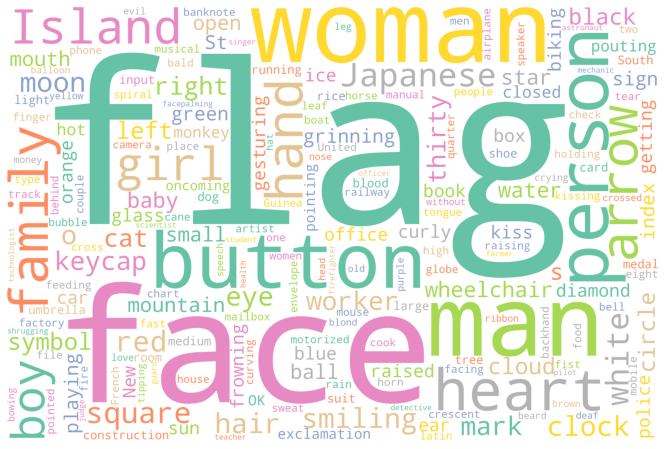

In [109]:
from wordcloud import WordCloud, STOPWORDS

fig, ax = plt.subplots(figsize=(12, 8))
total_string = ' '.join(df['name'])
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, 
                      background_color='white', colormap='Set2', collocations=False, 
                      stopwords = STOPWORDS).generate(total_string)
ax.imshow(wordcloud) 
ax.axis('off')
plt.show()

In [110]:
service_list = ['Apple', 'Google', 'Facebook', 'Windows']
emoji_labels = df['name'][:100].values

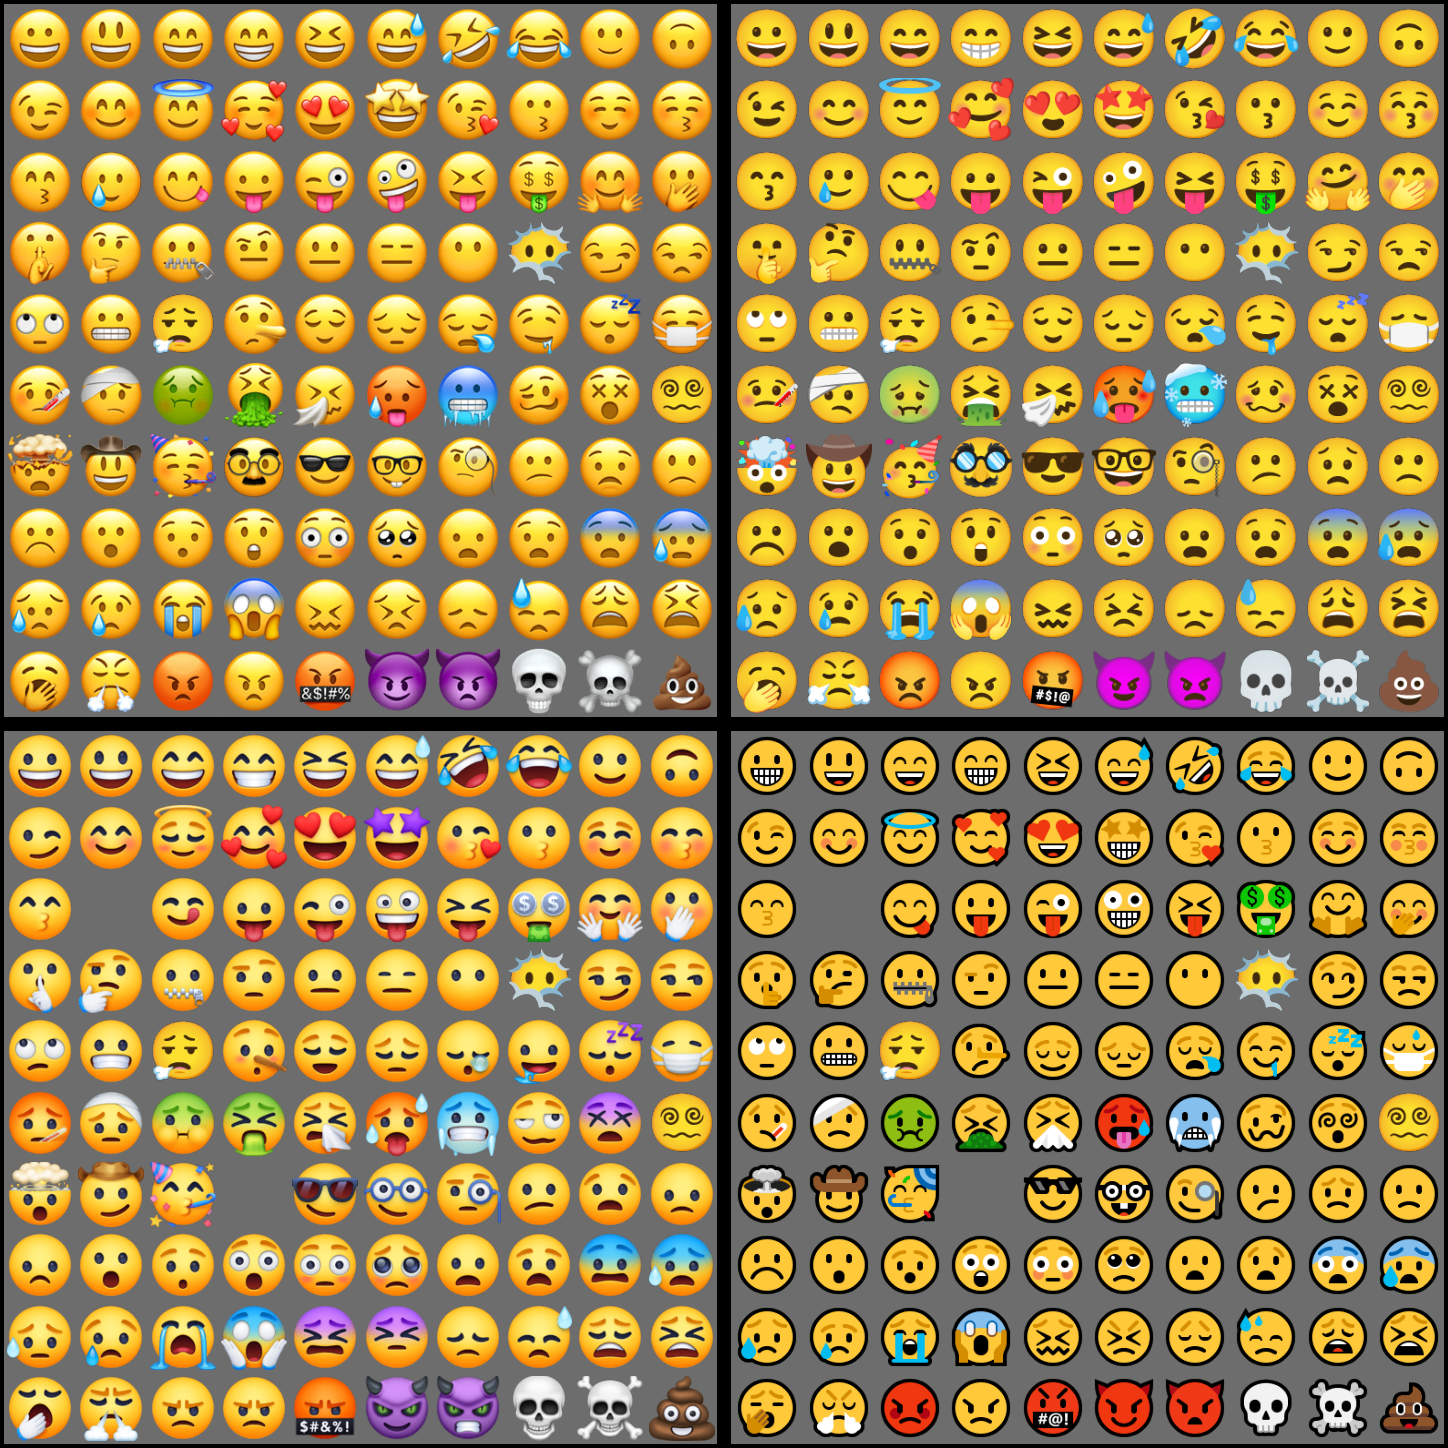

In [113]:
figure = plt.figure(constrained_layout=True, figsize=(20, 20))
figure.set_facecolor('black')
subfig = figure.subfigures(2, 2)

for fig, service in zip(subfig.flatten(), service_list):
#     fig.suptitle(service, color='black', fontsize=20)
    fig.set_facecolor('#6d6d6d')
    PATH = f'./dataset/image/{service}/'
    
    axes = fig.subplots(10, 10)   
    axes = axes.flatten()
    
    for idx, ax in enumerate(axes, 1):
        if os.path.exists(PATH+f'{idx}.png'):
            img = Image.open(PATH+f'{idx}.png')
            ax.imshow(img)
            # ax.set_xlabel(emoji_labels[idx-1], loc='left', fontsize=8)

        ax.axis('off')
    
plt.show()

In [34]:
def toimg(img_url):
    request.urlretrieve(img_url, 'img')
    img = Image.open('img')
    return img.convert("RGB")

def imgtoarray(img_url):
    try:
        img = toimg(img_url)
        return np.asarray(img, dtype=np.float32)
    except TypeError:
        return None

In [35]:
images = []
for service in ['Apple', 'Google', 'Facebook', 'Windows']:
    for url in df[service].values:
        images.append(imgtoarray(url))
labels = df['name'].to_list()*4
len(images), len(labels)

/opt/homebrew/Caskroom/miniforge/base/envs/cp1/lib/python3.8/site-packages/PIL/Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


(7264, 7264)

In [36]:
df_new = pd.DataFrame(zip(images, labels), columns=['Image', 'Label'])
df_new.shape

(7264, 2)

In [37]:
df_new.dropna(axis=0, inplace=True)

In [38]:
df_new.shape

(6813, 2)

In [39]:
df_new.reset_index(drop=True, inplace=True)

In [40]:
df_new

,Image,Label
0,"[[[71.0, 112.0, 76.0], [71.0, 112.0, 76.0], [7...",grinning face
1,"[[[71.0, 112.0, 76.0], [71.0, 112.0, 76.0], [7...",grinning face with big eyes
2,"[[[71.0, 112.0, 76.0], [71.0, 112.0, 76.0], [7...",grinning face with smiling eyes
3,"[[[71.0, 112.0, 76.0], [71.0, 112.0, 76.0], [7...",beaming face with smiling eyes
4,"[[[71.0, 112.0, 76.0], [71.0, 112.0, 76.0], [7...",grinning squinting face
...,...,...
6808,"[[[71.0, 112.0, 76.0], [71.0, 112.0, 76.0], [7...",crossed flags
6809,"[[[71.0, 112.0, 76.0], [71.0, 112.0, 76.0], [7...",black flag
6810,"[[[71.0, 112.0, 76.0], [71.0, 112.0, 76.0], [7...",white flag
6811,"[[[71.0, 112.0, 76.0], [71.0, 112.0, 76.0], [7...",rainbow flag


In [41]:
import re
df_new['Label'] = df_new['Label'].apply(lambda x: ''.join(re.findall(r'[ A-Za-z0-9]', x))).values.tolist()

In [42]:
texts = df_new['Label'].values

tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(texts)
word_dic = tokenizer.word_index
vocab_size = len(word_dic)
vocab_size

1683

In [43]:
# char_texts = df_new['Label'].apply(lambda x: re.findall(r'[ A-Za-z0-9]', x)).values.tolist()
# tokenizer = Tokenizer()
# tokenizer.fit_on_texts(char_texts)
# word_dic = tokenizer.word_index
# vocab_size = len(word_dic)
# vocab_size

In [44]:
sequences = tokenizer.texts_to_sequences(texts)
sequences[:1]

[[44, 2]]

In [45]:
padded = pad_sequences(sequences)
padded[:5]

array([[  0,   0,   0,   0,  44,   2],
       [  0,  44,   2,   5, 452,  31],
       [  0,  44,   2,   5,  21,  31],
       [  0, 453,   2,   5,  21,  31],
       [  0,   0,   0,  44, 264,   2]], dtype=int32)

In [46]:
train_images = np.stack(df_new['Image'].values/255.0)
train_labels = np.asarray(padded, dtype=np.float32)

train_images.shape, train_labels.shape

((6813, 72, 72, 3), (6813, 6))

In [50]:
batch_size = 32
num_channels = 3
num_classes = 256
image_size = 72
latent_dim = 4

In [51]:
dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
dataset = dataset.shuffle(buffer_size=1024).batch(batch_size)
dataset

<BatchDataset shapes: ((None, 72, 72, 3), (None, 6)), types: (tf.float32, tf.float32)>

In [52]:
generator_in_channels = latent_dim + num_classes
discriminator_in_channels = num_channels + num_classes
print(generator_in_channels, discriminator_in_channels)

260 259


In [53]:
# Create the discriminator.
discriminator = keras.Sequential(
    [
        keras.layers.InputLayer((72, 72, discriminator_in_channels)),
        layers.Conv2D(64, (3, 3), strides=(2, 2), padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(128, (3, 3), strides=(2, 2), padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.GlobalMaxPooling2D(),
        layers.Dense(1),
    ],
    name="discriminator",
)

# Create the generator.
generator = keras.Sequential(
    [
        keras.layers.InputLayer((generator_in_channels,)),
        # We want to generate 128 + num_classes coefficients to reshape into a
        # 7x7x(128 + num_classes) map.
        layers.Dense(18 * 18 * generator_in_channels),
        layers.LeakyReLU(alpha=0.2),
        layers.Reshape((18, 18, generator_in_channels)),
        layers.Conv2DTranspose(128, (3, 3), strides=(2, 2), padding="same"),
        layers.BatchNormalization(),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2DTranspose(64, (3, 3), strides=(2, 2), padding="same"),
        layers.BatchNormalization(),
        layers.LeakyReLU(alpha=0.2),
        # layers.Conv2DTranspose(16, (3, 3), strides=(2, 2), padding="same"),
        # layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(3, (9, 9), padding="same", activation="sigmoid"),
    ],
    name="generator",
)

In [54]:
class ConditionalGAN(keras.Model):
    def __init__(self, discriminator, generator, latent_dim):
        super(ConditionalGAN, self).__init__()
        self.len_text = 6
        self.discriminator = discriminator
        self.generator = generator
        self.latent_dim = latent_dim
        self.gen_loss_tracker = keras.metrics.Mean(name="generator_loss")
        self.disc_loss_tracker = keras.metrics.Mean(name="discriminator_loss")
        self.word_embedding = keras.Sequential(
        [
            keras.layers.InputLayer(input_shape=(self.len_text,)),
            layers.Embedding(vocab_size, 250, input_length=self.len_text),
            layers.Conv1D(128, 2, padding="same", strides=2),
            layers.BatchNormalization(),
            layers.LeakyReLU(alpha=0.2),
            layers.MaxPool1D(pool_size=2, strides=2),
            # layers.Conv1D(128, 2, padding="same", strides=2),
            # layers.BatchNormalization(),
            # layers.LeakyReLU(alpha=0.2),
            # layers.MaxPool1D(pool_size=2, strides=2),
            layers.GRU(64),
            layers.Flatten(),
            layers.Dense(num_classes),
        ])

    @property
    def metrics(self):
        return [self.gen_loss_tracker, self.disc_loss_tracker]

    def compile(self, d_optimizer, g_optimizer, loss_fn):
        super(ConditionalGAN, self).compile()
        self.d_optimizer = d_optimizer
        self.g_optimizer = g_optimizer
        self.loss_fn = loss_fn

    def train_step(self, data):
        # Unpack the data.
        real_images, one_hot_labels = data
        
        emb_wv = self.word_embedding(one_hot_labels)
        
        # Add dummy dimensions to the labels so that they can be concatenated with
        # the images. This is for the discriminator.
        image_one_hot_labels = emb_wv[:, :, None, None]
        image_one_hot_labels = tf.repeat(
            image_one_hot_labels, repeats=[image_size * image_size]
        )
        image_one_hot_labels = tf.reshape(
            image_one_hot_labels, (-1, image_size, image_size, num_classes)
        )

        # Sample random points in the latent space and concatenate the labels.
        # This is for the generator.
        batch_size = tf.shape(real_images)[0]
        random_latent_vectors = tf.random.normal(shape=(batch_size, self.latent_dim))
        random_vector_labels = tf.concat(
            [random_latent_vectors, emb_wv], axis=1
        )

        # Decode the noise (guided by labels) to fake images.
        generated_images = self.generator(random_vector_labels)

        # Combine them with real images. Note that we are concatenating the labels
        # with these images here.
        fake_image_and_labels = tf.concat([generated_images, image_one_hot_labels], -1)
        real_image_and_labels = tf.concat([real_images, image_one_hot_labels], -1)
        combined_images = tf.concat(
            [fake_image_and_labels, real_image_and_labels], axis=0
        )

        # Assemble labels discriminating real from fake images.
        labels = tf.concat(
            [tf.ones((batch_size, 1)), tf.zeros((batch_size, 1))], axis=0
        )

        # Train the discriminator.
        with tf.GradientTape() as tape:
            predictions = self.discriminator(combined_images)
            d_loss = self.loss_fn(labels, predictions)
        grads = tape.gradient(d_loss, self.discriminator.trainable_weights)
        self.d_optimizer.apply_gradients(
            zip(grads, self.discriminator.trainable_weights)
        )

        # Sample random points in the latent space.
        random_latent_vectors = tf.random.normal(shape=(batch_size, self.latent_dim))
        random_vector_labels = tf.concat(
            [random_latent_vectors, emb_wv], axis=1
        )

        # Assemble labels that say "all real images".
        misleading_labels = tf.zeros((batch_size, 1))

        # Train the generator (note that we should *not* update the weights
        # of the discriminator)!
        with tf.GradientTape() as tape:
            fake_images = self.generator(random_vector_labels)
            fake_image_and_labels = tf.concat([fake_images, image_one_hot_labels], -1)
            predictions = self.discriminator(fake_image_and_labels)
            g_loss = self.loss_fn(misleading_labels, predictions)
        grads = tape.gradient(g_loss, self.generator.trainable_weights)
        self.g_optimizer.apply_gradients(zip(grads, self.generator.trainable_weights))

        # Monitor loss.
        self.gen_loss_tracker.update_state(g_loss)
        self.disc_loss_tracker.update_state(d_loss)
        return {
            "g_loss": self.gen_loss_tracker.result(),
            "d_loss": self.disc_loss_tracker.result(),
        }

In [55]:
cond_gan = ConditionalGAN(
    discriminator=discriminator, generator=generator, latent_dim=latent_dim
)



In [56]:
checkpoint_path = "c-gan_training_4/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

In [57]:
cond_gan.compile(
    d_optimizer=keras.optimizers.Adam(learning_rate=0.0002),
    g_optimizer=keras.optimizers.Adam(learning_rate=0.0002),
    loss_fn=keras.losses.BinaryCrossentropy(from_logits=True),
)

In [61]:
# latest = tf.train.latest_checkpoint(checkpoint_dir)
# if latest:

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)
# es_callback = tf.keras.callbacks.EarlyStopping(monitor='g_loss', patience=1000)

# cond_gan.save_weights(checkpoint_path.format(epoch=0))

In [156]:
cond_gan.load_weights(checkpoint_path)

In [157]:
history = cond_gan.fit(dataset, epochs=500,
          callbacks=[cp_callback, 
          #            # es_callback
                    ]
                      )

Epoch 1/500
213/213 [==============================] - ETA: 0s - g_loss: 5.4241 - d_loss: 0.0688
Epoch 00001: saving model to c-gan_training_4/cp.ckpt
213/213 [==============================] - 31s 145ms/step - g_loss: 5.4238 - d_loss: 0.0688
Epoch 2/500
213/213 [==============================] - ETA: 0s - g_loss: 5.5273 - d_loss: 0.1488
Epoch 00002: saving model to c-gan_training_4/cp.ckpt
213/213 [==============================] - 31s 146ms/step - g_loss: 5.5261 - d_loss: 0.1487
Epoch 3/500
213/213 [==============================] - ETA: 0s - g_loss: 5.3064 - d_loss: 0.0865
Epoch 00003: saving model to c-gan_training_4/cp.ckpt
213/213 [==============================] - 31s 146ms/step - g_loss: 5.3059 - d_loss: 0.0865
Epoch 4/500
213/213 [==============================] - ETA: 0s - g_loss: 5.6095 - d_loss: 0.0847
Epoch 00004: saving model to c-gan_training_4/cp.ckpt
213/213 [==============================] - 31s 146ms/step - g_loss: 5.6088 - d_loss: 0.0847
Epoch 5/500
213/213 [=======

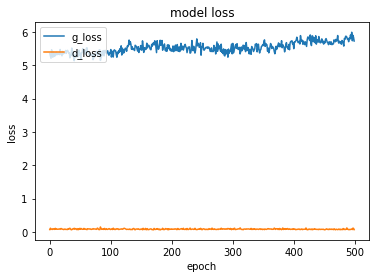

In [158]:
# summarize history for loss
plt.plot(history.history['g_loss'])
plt.plot(history.history['d_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['g_loss', 'd_loss'], loc='upper left')
plt.show()

In [159]:
# os.listdir(checkpoint_dir)
# latest = tf.train.latest_checkpoint(checkpoint_dir)
# latest

# cond_gan2 = ConditionalGAN(
#     discriminator=discriminator, generator=generator, latent_dim=latent_dim
# )

# cond_gan2.load_weights(latest)

In [160]:
# cond_gan2.compile(
#     d_optimizer=keras.optimizers.Adam(learning_rate=0.0002),
#     g_optimizer=keras.optimizers.Adam(learning_rate=0.0002),
#     loss_fn=keras.losses.BinaryCrossentropy(from_logits=True),
# )
# cond_gan2.save_weights(checkpoint_path.format(epoch=0))
# history = cond_gan2.fit(dataset, epochs=300,
#           callbacks=[cp_callback, es_callback])

In [161]:
# We first extract the trained generator from our Conditiona GAN.
trained_gen = cond_gan.generator

# Choose the number of intermediate images that would be generated in
# between the interpolation + 2 (start and last images).
num_interpolation = 16  # @param {type:"integer"}

# Sample noise for the interpolation.
interpolation_noise = tf.random.normal(shape=(1, latent_dim))
interpolation_noise = tf.repeat(interpolation_noise, repeats=num_interpolation)
interpolation_noise = tf.reshape(interpolation_noise, (num_interpolation, latent_dim))

def interpolate_class(num_interpolation, texts):
    test_seq = tokenizer.texts_to_sequences(texts)
    test_pad = pad_sequences(test_seq, maxlen=6)
    test_pad = tf.cast(test_pad, dtype='float32')
    emb_wv = cond_gan.word_embedding(test_pad)
    # Combine the noise and the labels and run inference with the generator.
    noise_and_labels = tf.concat([interpolation_noise, emb_wv], 1)
    fake = trained_gen.predict(noise_and_labels)
    return fake

test = ['smiling face with angry eyes', 'cold face', 'grinning face', 'winking face with tongue', 
        'fearful face with spiral eyes', 'sleepy face', 'screaming face with tongue', 'angry face', 
        'grinning face in clouds', 'hot zipper mouth face', 'vommiting poo', 'nerd face', 
       'beaming face with hearts', 'shushing poo', 'sad face with cowboy hat', 'flushed face with sunglasses']

fake_images = interpolate_class(num_interpolation, test)


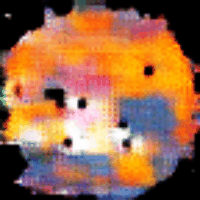

In [162]:
import time
fake_images *= 255.0
converted_images = fake_images.astype(np.uint8)
converted_images = tf.image.resize(converted_images, (200, 200)).numpy().astype(np.uint8)
time_stamp = time.time()
imageio.mimsave(f"./gan_imgs/c-gan-{cond_gan.len_text}-{cond_gan.latent_dim}-{int(time_stamp)}.gif", converted_images, fps=1)
embed.embed_file(f"./gan_imgs/c-gan-{cond_gan.len_text}-{cond_gan.latent_dim}-{int(time_stamp)}.gif")